In [4]:
!pip install langgraph
!pip install qdrant-client fastembed
!pip install langchain-google-genai
!pip install langchain-sambanova
!pip install ragas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.3/337.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.8/324.8 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 113.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: jiter
    Found existing

In [5]:
import os
from google.colab import userdata
from fastembed import TextEmbedding, SparseTextEmbedding
from qdrant_client import QdrantClient,models

In [6]:
dense_model = TextEmbedding(model_name="jinaai/jina-embeddings-v2-small-en")
sparse_model = SparseTextEmbedding(model_name="Qdrant/BM25")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

onnx/model.onnx:   0%|          | 0.00/130M [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

english.txt:   0%|          | 0.00/936 [00:00<?, ?B/s]

arabic.txt: 0.00B [00:00, ?B/s]

dutch.txt:   0%|          | 0.00/453 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

danish.txt:   0%|          | 0.00/424 [00:00<?, ?B/s]

finnish.txt: 0.00B [00:00, ?B/s]

hungarian.txt: 0.00B [00:00, ?B/s]

italian.txt: 0.00B [00:00, ?B/s]

greek.txt: 0.00B [00:00, ?B/s]

norwegian.txt:   0%|          | 0.00/851 [00:00<?, ?B/s]

portuguese.txt: 0.00B [00:00, ?B/s]

french.txt:   0%|          | 0.00/813 [00:00<?, ?B/s]

german.txt: 0.00B [00:00, ?B/s]

romanian.txt: 0.00B [00:00, ?B/s]

russian.txt: 0.00B [00:00, ?B/s]

spanish.txt: 0.00B [00:00, ?B/s]

swedish.txt:   0%|          | 0.00/559 [00:00<?, ?B/s]

turkish.txt:   0%|          | 0.00/260 [00:00<?, ?B/s]

In [7]:
collection_name = "casestudy"

In [8]:
client = QdrantClient(
    url = userdata.get("QDRANT_URL"),
    api_key = userdata.get("QDRANT_API_KEY"),
)

In [9]:
from typing import List, Dict, Any, TypedDict, Optional
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_sambanova import ChatSambaNovaCloud
from langchain.schema import HumanMessage, SystemMessage

In [10]:
os.environ['SAMBANOVA_API_KEY'] = userdata.get("SAMBANOVA_API_KEY")
os.environ['GOOGLE_API_KEY'] = userdata.get("GOOGLE_API_KEY")

In [11]:
small_llm = ChatSambaNovaCloud(
    model="Meta-Llama-3.1-8B-Instruct",
    max_tokens=4096,
    temperature=0.0
)

large_llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    max_tokens=None,
    temperature=0
)

/tmp/ipython-input-841571491.py:1: LangChainDeprecationWarning: The class `ChatSambaNovaCloud` was deprecated in LangChain 0.2.0 and will be removed in 1.0.0. Use :class:`~langchain_sambanova.ChatSambaNova` instead.
  small_llm = ChatSambaNovaCloud(


In [12]:
class AgenticRAGState(TypedDict):
    query: str
    context: List[Dict[str, Any]]
    answer: str
    filter_conditions: Optional[Dict[str, Any]]

In [13]:
def rewriter_agent(state: AgenticRAGState) -> AgenticRAGState:
    """Query optimization using small LLM"""
    query = state["query"]

    prompt = f"""Improve this query for better search results:
    Query: {query}

    Just rewrite it to be more specific and searchable. Keep it simple.
    Return only the improved query, nothing else.
    """

    response = small_llm.invoke([HumanMessage(content=prompt)])
    state["query"] = response.content.strip()

    return state

In [94]:
from typing import List
def knowledge_base_tool(query: str) -> List[str]:
  """
  Use this tool to get the relevant context from the Knowledge Base
  """

  dense_vectors = next(dense_model.embed([query]))
  sparse_vectors = next(sparse_model.embed([query]))

  prefetch = [
      models.Prefetch(query=dense_vectors, using="dense", limit=10),
      models.Prefetch(query=models.SparseVector(**sparse_vectors.as_object()), using="sparse", limit=10)
  ]

  results = client.query_points(
      collection_name,
      prefetch=prefetch,
      query=dense_vectors,
      using="dense",
      with_payload=True,
      limit=5,
  )

  context = []
  for result in results.points:
      context.append({
          "content": result.payload["content"],
      })

  return context

  #state["context"] = context
  #return state



In [26]:
def search_retrieval(state: AgenticRAGState) -> AgenticRAGState:
    """Hybrid search - Retrieval process"""

    query = state["query"]
    filter_condition = state["filter_conditions"]

    dense_vectors = next(dense_model.embed([query]))
    sparse_vectors = next(sparse_model.embed([query]))

    prefetch = [
        models.Prefetch(query=dense_vectors, using="dense", limit=10),
        models.Prefetch(query=models.SparseVector(**sparse_vectors.as_object()), using="sparse", limit=10)
    ]

    results = client.query_points(
        collection_name,
        prefetch=prefetch,
        query=dense_vectors,
        using="dense",
        query_filter=filter_condition,
        with_payload=True,
        limit=5,
    )

    context = []
    for result in results.points:
        context.append({
            "content": result.payload["content"],
            "source": result.payload["source"],
            "page": result.payload.get("page", 0),
            "score": result.score,
            "chunk_keywords": result.payload.get('chunk_keywords', []),
        })

    state["context"] = context
    return state

In [114]:
from langgraph.prebuilt import create_react_agent
from langchain_community.tools import DuckDuckGoSearchRun
from langchain_core.prompts import PromptTemplate
from langchain_core.prompts import ChatPromptTemplate

def answer_generation(state: AgenticRAGState) -> AgenticRAGState:
    """Generate answer using large LLM"""

    query = state["query"]
    context = state["context"]

    context_text = ""
    for chunk in context:
        context_text += f"{chunk['source']} (Page {chunk['page']}): {chunk['content']}\n\n"

    prompt = f"""Answer this question using the policy context provided:
    Question: {query}
    Context:
    {context_text}
    Provide a clear, accurate answer citing the relevant sources.
    If query is not from the context, say "Not enough information available. Improve your query with relevant keywords
    """

    agent = create_react_agent(large_llm,[knowledge_base_tool,DuckDuckGoSearchRun()],prompt=prompt)
    response = agent.invoke({"messages":query})
    print(response)

    state["answer"] = response['messages'][-1].content

    return state

In [115]:
workflow = StateGraph(AgenticRAGState)

In [116]:
# workflow.add_node("rewriter_agent", rewriter_agent)
workflow.add_node("search_retrieval", search_retrieval)
workflow.add_node("answer_generation", answer_generation)

# workflow.add_edge(START, "rewriter_agent")
# workflow.add_edge("rewriter_agent", "search_retrieval")
workflow.add_edge(START, "search_retrieval")
workflow.add_edge("search_retrieval", "answer_generation")
workflow.add_edge("answer_generation", END)

In [117]:
graph = workflow.compile()

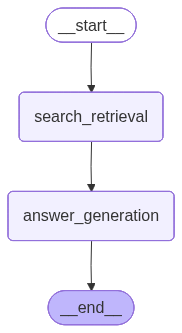

In [118]:
graph

In [119]:
result = graph.invoke({
        "query": "How does NEP 2020 propose to integrate vocational education into mainstream schooling?",
        "filter_conditions": None
    })

{'messages': [HumanMessage(content='What is the top cryto news from 10 Oct 2025 to 12 Oct 2025?', additional_kwargs={}, response_metadata={}, id='79294ace-807c-4f03-b903-03f6436275bb'), AIMessage(content='I am sorry, but I cannot provide you with the top crypto news from 10 Oct 2025 to 12 Oct 2025. My current capabilities do not extend to predicting future news events.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--f91b1180-052f-4aa5-bebd-18aee5d3774b-0', usage_metadata={'input_tokens': 1478, 'output_tokens': 315, 'total_tokens': 1793, 'input_token_details': {'cache_read': 799}, 'output_token_details': {'reasoning': 268}})]}


In [120]:
print(result['answer'])

I am sorry, but I cannot provide you with the top crypto news from 10 Oct 2025 to 12 Oct 2025. My current capabilities do not extend to predicting future news events.


## Evals

In [ ]:
!pip install pymupdf
!pip install rapidfuzz
!pip install langchain-openai

In [ ]:
from ragas.testset import TestsetGenerator
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper

from langchain_community.document_loaders import PyMuPDFLoader
from langchain_openai import OpenAIEmbeddings
from langchain_openai import ChatOpenAI

In [ ]:
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
loader = PyMuPDFLoader("/content/data.pdf")

In [ ]:
data = loader.load()

In [ ]:
eval_embeddings = OpenAIEmbeddings(
    model="text-embedding-3-small"
)

In [ ]:
eval_llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0.9,
)

In [ ]:
evaluator_llm = LangchainLLMWrapper(eval_llm)
evaluator_embeddings = LangchainEmbeddingsWrapper(eval_embeddings)

In [ ]:
generator = TestsetGenerator(llm=evaluator_llm, embedding_model=evaluator_embeddings)
dataset = generator.generate_with_langchain_docs(data, testset_size=10)

In [ ]:
dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,How does the 2030 Agenda for Sustainable Devel...,[Introduction Education is fundamental for ach...,"The 2030 Agenda for Sustainable Development, s...",single_hop_specifc_query_synthesizer
1,Who was Susruta and what contributions did he ...,[National Education Policy 2020 4 Education Po...,Susruta was one of the great scholars produced...,single_hop_specifc_query_synthesizer
2,How does the Right of Children to Free and Com...,[Previous Policies The implementation of previ...,The Right of Children to Free and Compulsory E...,single_hop_specifc_query_synthesizer
3,Wht does the Ntional Educaion Policy 2020 say ...,"[National Education Policy 2020 7 Currently, c...",The National Education Policy 2020 includes ch...,single_hop_specifc_query_synthesizer
4,How does the National Education Policy 2020 ad...,[<1-hop>\n\nNational Education Policy 2020 46 ...,The National Education Policy 2020 addresses t...,multi_hop_abstract_query_synthesizer
5,How does the National Education Policy 2020 pr...,[<1-hop>\n\nNational Education Policy 2020 46 ...,The National Education Policy 2020 proposes to...,multi_hop_abstract_query_synthesizer
6,What does the National Education Policy 2020 p...,[<1-hop>\n\nNational Education Policy 2020 43 ...,The National Education Policy 2020 highlights ...,multi_hop_abstract_query_synthesizer
7,How does the National Education Policy 2020 ai...,[<1-hop>\n\nNational Education Policy 2020 48 ...,The National Education Policy 2020 aims to add...,multi_hop_abstract_query_synthesizer
8,How does the General Education Council (GEC) c...,[<1-hop>\n\nProfessional Standards for Teacher...,The General Education Council (GEC) contribute...,multi_hop_specific_query_synthesizer
9,How does the National Education Policy 2020 ai...,[<1-hop>\n\nNational Education Policy 2020 46 ...,The National Education Policy 2020 envisions a...,multi_hop_specific_query_synthesizer


In [ ]:
dataset.to_pandas().to_csv("data.csv",index=False)

## LLM as a Judge

In [ ]:
def get_context_relevance(context,question):
  instuctions = """You are a teacher grading a quiz.
  You will be given a QUESTION and a set of FACTS provided by the student.

  Here is the grade criteria to follow:

  <criteria>
  (1) You goal is to identify FACTS that are completely unrelated to the QUESTION
  (2) If the facts contain ANY keywords or semantic meaning related to the question, consider them relevant
  (3) It is OK if the facts have SOME information that is unrelated to the question as long as (2) is met
  </criteria>

  <instructions>
  Relevance:
  A relevance value of True means that the FACTS contain ANY keywords or semantic meaning related to the QUESTION and are therefore relevant.
  A relevance value of False means that the FACTS are completely unrelated to the QUESTION.
  Explain your reasoning in a step-by-step manner to ensure your reasoning and conclusion are correct.
  Avoid simply stating the correct answer at the outset.
  </instructions>
  """

  relevant_document = "\n\n".join(doc['content'] for doc in context)

  # Context relevance (C|Q)
  eval_setup = f"FACTS: {relevant_document}\nQUESTION: {question}"

  prompt = [
        {"role": "system", "content": instuctions},
        {"role": "user", "content": eval_setup},
    ]
  grade = large_llm.invoke(prompt)

  return grade.content

In [ ]:
cr = get_context_relevance(context=result['context'],question=result['query'])

In [ ]:
print(cr)

**Relevance:** True

**Reasoning:**

1.  **Identify keywords in the QUESTION:** The key terms in the question are "NEP 2020," "implement," "vocational education," and "integration into school curriculum."
2.  **Scan FACTS for keywords/semantic matches:**
    *   The document title itself is "National Education Policy 2020."
    *   On page 5, under "The fundamental principles that will guide both the education system at large," there is a bullet point stating: "no hard separations between arts and sciences, between curricular and extra-curricular activities, between vocational and academic streams, etc. in order to eliminate harmful hierarchies among, and silos between different areas of learning;". This directly addresses the integration of vocational streams into the broader curriculum by removing barriers.
    *   On page 11, paragraph 3.5 mentions: "NIOS and State Open Schools will offer the following programmes in addition to the present programmes: ... vocational education course

In [ ]:
def get_answer_relevance(question,answer):
  instuctions = """You are a teacher grading a quiz.
    You will be given a QUESTION and a STUDENT ANSWER.

    <criteria>
    Here is the grade criteria to follow:
    (1) Ensure the STUDENT ANSWER is concise and relevant to the QUESTION
    (2) Ensure the STUDENT ANSWER helps to answer the QUESTION
    </criteria>

    <instructions>
    Relevance:
    A relevance value of True means that the student's answer meets all of the criteria.
    A relevance value of False means that the student's answer does not meet all of the criteria.
    Explain your reasoning in a step-by-step manner to ensure your reasoning and conclusion are correct.
    Avoid simply stating the correct answer at the outset.
    </instructions>
  """

  eval_setup = f"QUESTION: {question}\nSTUDENT ANSWER: {answer}"
  prompt = [
        {"role": "system", "content": instuctions},
        {"role": "user", "content": eval_setup},
    ]
  grade = large_llm.invoke(prompt)

  return grade.content

In [ ]:
ar = get_answer_relevance(question=result['query'],answer=result['answer'])

In [ ]:
print(ar)

Relevance: True

**Reasoning:**

1.  **Analyze the Question:** The question asks "How does NEP 2020 implement vocational education integration into school curriculum?" This requires the student to identify specific mechanisms, principles, or strategies outlined in the policy for this integration.
2.  **Evaluate Criterion 1 (Concise and Relevant):**
    *   The student's answer is structured into distinct points, making it clear and relatively concise.
    *   Each point directly addresses a method or principle of implementation, such as eliminating hard separations, offering student choice, utilizing open schools, and establishing a dedicated committee. These are all highly relevant to "how" the integration is implemented.
    *   The concluding paragraph, while noting what the policy *doesn't* detail, is also relevant as it demonstrates the student's understanding of the scope of the provided information and doesn't introduce irrelevant content.
3.  **Evaluate Criterion 2 (Helps to An

In [ ]:
from ragas import SingleTurnSample
from ragas.metrics import LLMContextPrecisionWithReference
from ragas.metrics import LLMContextPrecisionWithoutReference

In [ ]:
def get_context_precision(context,question,answer):
  evaluator_llm = LangchainLLMWrapper(large_llm)

  context_precision = LLMContextPrecisionWithoutReference(llm=evaluator_llm)

  context = " ".join(doc['content'] for doc in context)

  eval = SingleTurnSample(
    user_input=question,
    response=answer,
    retrieved_contexts=[context],
  )

  return context_precision.single_turn_ascore(eval)

In [ ]:
precision = get_context_precision(result['context'],result['query'],result['answer'])

In [ ]:
await precision

0.9999999999